# SNOW DEPTH FROM GLDAS-2.1: Global Land Data Assimilation System

https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V021_NOAH_G025_T3H#bands

## PART I: QUERY DATA FROM GEE SERVER

In [1]:
#installing dependencies
import shapefile_library
import ee
import geemap
import os

In [2]:
#user select raw data destination folder
destination_folder = input('destination_folder: ')

destination_folder: C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20


In [5]:
#plot wold map
Map = geemap.Map()

In [6]:
#upload shapefile of AOE
list_shp = [shapefile_library.aimags]
map_shapefile = geemap.shp_to_ee(list_shp[0])
Map.addLayer(map_shapefile, {}, 'map_shapefile')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### Selected data from year 2000 to calculate climatology 

In [10]:
#user input start year (Data starts from year 2000)
#end year automatically set to most current data

year = int(input('input start year'))

#loop for each year

while 1998 < year < 2030:
    print('Selected year: ', year)
    start_date = str(year)+str('-01-01')
    end_date = str(year)+str('-12-31')
    
    dataset = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H')     .filterDate (start_date, end_date)     .map(lambda image: image.clip(map_shapefile)) 
    SnowDepth_inst = dataset.select('SnowDepth_inst')    
    SnowDepth_instVis = {
        'min': 0.0,
        'max': 1.0,
        'palette': ['1303ff', '42fff6', 'f3ff40', 'ff5d0f']
    }
    Map.setCenter(106, 47, 4)
    Map.addLayer(SnowDepth_inst, SnowDepth_instVis, 'SnowDepth_inst')
    Map
                                                                                   
#to csv 
                                                                                   
    out_dir = os.path.join(os.path.expanduser('~'), destination_folder)

    csv_file_name = str(year)+'SnowDepth_inst'+'_aimags'+'.csv' 

    out_SnowDepth_inst_stats = os.path.join(out_dir, csv_file_name)  

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
        
# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM

    print('Calculating MEAN')
    geemap.zonal_statistics(SnowDepth_inst, map_shapefile, out_SnowDepth_inst_stats, statistics_type='MEAN', scale=27830)
    
    year = year +1
    
print ('Done! Check destination folder! Bye bye!')

input start year2000
Selected year:  2000
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2000SnowDepth_inst_aimags.csv
Selected year:  2001
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2001SnowDepth_inst_aimags.csv
Selected year:  2002
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2002SnowDepth_inst_aimags.csv
Selected year:  2003
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2003SnowDepth_inst_aimags.csv
Selected year:  2004
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2004

Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2021SnowDepth_inst_aimags.csv
Selected year:  2022
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20\2022SnowDepth_inst_aimags.csv
Selected year:  2023
Calculating MEAN
Computing statistics ...


Exception: Image.reduceRegions: Unable to find a crs.

## PART II: COMPILE & CLEAN DATA

### Merge 20 years of data into a single CSV file

In [11]:
import pandas as pd
import os
import glob

In [13]:
#COMBINE raw_data FROM FOLDERS PATH

path = input("Enter the path of your csv file folder: ")

#C:\Users\aster\OneDrive\Desktop\Air_Temperature\raw_data


all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

frame = pd.concat(li, axis=1, ignore_index=True)
frame

#export to csv
frame.to_csv("Snow_Depth_20Years_aimags.csv")

#combined_csv.to_csv( "concat_csv.csv", index=False, encoding='utf-8-sig')

print ("New file created")

Enter the path of your csv file folder: C:\Users\aster\OneDrive\Desktop\SNOW_DEPTH_2022_04_20
New file created


### Read in updated CSV file Snow Depth All Years

In [1]:
# installing dependencies
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [2]:
#All Years
snow_depth = pd.read_csv ("D:/Users/aster/Desktop/SNOW_DEPTH_2022_04_20/Snow_Depth_20Years_aimags.csv", header=1, dtype=object)
snow_depth

,0,A20000101_0300_SnowDepth_inst,A20000101_0600_SnowDepth_inst,A20000101_0900_SnowDepth_inst,A20000101_1200_SnowDepth_inst,A20000101_1500_SnowDepth_inst,A20000101_1800_SnowDepth_inst,A20000101_2100_SnowDepth_inst,A20000102_0000_SnowDepth_inst,A20000102_0300_SnowDepth_inst,...,NL_NAME_1.22,CCA_1.22,HASC_1.22,ID_0.22,NAME_0.22,TYPE_1.22,VARNAME_1.22,CCN_1.22,ID_1.22,NAME_1.22
0,1,0.001196717326669971,0.0013261229249331473,0.0015666971536751522,0.0026704895105286093,0.003456590939098125,0.0037193679448025096,0.003978729159142522,0.011108816583789167,0.0166667455849035,...,NaN,NaN,NaN,NaN,Umnugovi,NaN,NaN,NaN,19,NaN
1,2,0.013050563619811958,0.013982211253683062,0.023664099609624806,0.024279290694766822,0.024737667165541696,0.02518212721373145,0.02560238563202607,0.024897237636719482,0.029986225312077393,...,NaN,NaN,NaN,NaN,Uvurkhangai,NaN,NaN,NaN,21,NaN
2,3,0.020282991058929313,0.020586739841086676,0.02075793795071692,0.020752584109314322,0.020737429071489764,0.020755968896349307,0.020763184143479125,0.02025510693779006,0.021677889636078113,...,NaN,NaN,NaN,NaN,Arkhangai,NaN,NaN,NaN,1,NaN
3,4,0.16383294871158863,0.1663801295360739,0.16829753612595771,0.17036745032124131,0.17280949896066244,0.1750827969798523,0.17737042585471366,0.1766071188605115,0.17676574604847056,...,NaN,NaN,NaN,NaN,BayanUlgii,NaN,NaN,NaN,2,NaN
4,5,0.009550381530211722,0.010599043061760224,0.010686327840957867,0.011013390468956299,0.01108509089883938,0.011072381152981356,0.011075568661322428,0.011129463383290362,0.015464134233845255,...,NaN,NaN,NaN,NaN,Bayankhongor,NaN,NaN,NaN,3,NaN
5,6,0.09635038041842937,0.1027291004788606,0.10463066224276871,0.10470127377297625,0.10469330512288812,0.10488704599177383,0.10490921762481903,0.1033326965651346,0.10477899968831102,...,NaN,NaN,NaN,NaN,Bulgan,NaN,NaN,NaN,4,NaN
6,7,0.059796550458251954,0.059687062587860135,0.05955849010748363,0.05951471672144862,0.059493800106074295,0.05951875991657416,0.05952641503267854,0.08466479754190881,0.0846365490852983,...,NaN,NaN,NaN,NaN,DarkhanUul,NaN,NaN,NaN,5,NaN
7,8,0.031030186682393223,0.031118656171519876,0.0318076681993862,0.032121917605327475,0.03628922000736498,0.04622486891910203,0.056227113701005194,0.05573002904162192,0.05562549578158692,...,NaN,NaN,NaN,NaN,Dornod,NaN,NaN,NaN,6,NaN
8,9,0.009781695210204226,0.01098249702420267,0.012225819061099916,0.013670701252947745,0.01517401507742391,0.016715980463535066,0.01827644213411686,0.014971023200326327,0.015533852703813581,...,NaN,NaN,NaN,NaN,Dornogovi,NaN,NaN,NaN,7,NaN
9,10,0.005412773230893905,0.006481448151542352,0.01200714806040274,0.013168449101541487,0.014477490569724489,0.015648021235147365,0.0168140442056268,0.01654834263352021,0.018185611315387755,...,NaN,NaN,NaN,NaN,Dundgovi,NaN,NaN,NaN,8,NaN


In [3]:
snow_depth.shape

(22, 65194)

In [4]:
snow_depth.columns

Index(['0', 'A20000101_0300_SnowDepth_inst', 'A20000101_0600_SnowDepth_inst',
       'A20000101_0900_SnowDepth_inst', 'A20000101_1200_SnowDepth_inst',
       'A20000101_1500_SnowDepth_inst', 'A20000101_1800_SnowDepth_inst',
       'A20000101_2100_SnowDepth_inst', 'A20000102_0000_SnowDepth_inst',
       'A20000102_0300_SnowDepth_inst',
       ...
       'NL_NAME_1.22', 'CCA_1.22', 'HASC_1.22', 'ID_0.22', 'NAME_0.22',
       'TYPE_1.22', 'VARNAME_1.22', 'CCN_1.22', 'ID_1.22', 'NAME_1.22'],
      dtype='object', length=65194)

### Clean up the data!

##### Drop columns of NAN

In [5]:
nan_df = snow_depth.dropna(axis='columns', how='all')
nan_df 

,0,A20000101_0300_SnowDepth_inst,A20000101_0600_SnowDepth_inst,A20000101_0900_SnowDepth_inst,A20000101_1200_SnowDepth_inst,A20000101_1500_SnowDepth_inst,A20000101_1800_SnowDepth_inst,A20000101_2100_SnowDepth_inst,A20000102_0000_SnowDepth_inst,A20000102_0300_SnowDepth_inst,...,A20220409_1500_SnowDepth_inst,A20220409_2100_SnowDepth_inst,A20220410_0000_SnowDepth_inst,A20220410_0600_SnowDepth_inst,A20220410_1200_SnowDepth_inst,A20220410_1500_SnowDepth_inst,A20220410_2100_SnowDepth_inst,system:index.22,NAME_0.22,ID_1.22
0,1,0.001196717326669971,0.0013261229249331473,0.0015666971536751522,0.0026704895105286093,0.003456590939098125,0.0037193679448025096,0.003978729159142522,0.011108816583789167,0.0166667455849035,...,0.0,0.0,0.0,0.0,0.0,0.0,1.1346153659330588E-5,0,Umnugovi,19
1,2,0.013050563619811958,0.013982211253683062,0.023664099609624806,0.024279290694766822,0.024737667165541696,0.02518212721373145,0.02560238563202607,0.024897237636719482,0.029986225312077393,...,0.0,5.0974057458627925E-6,1.218330461352889E-5,0.0,0.006495774045133607,0.010413596436725974,0.013188856404240964,1,Uvurkhangai,21
2,3,0.020282991058929313,0.020586739841086676,0.02075793795071692,0.020752584109314322,0.020737429071489764,0.020755968896349307,0.020763184143479125,0.02025510693779006,0.021677889636078113,...,0.003100326957260131,0.004558346684139465,0.007534196633175874,0.017269481663263465,0.026891748085004174,0.030476474096206428,0.031174386041614256,2,Arkhangai,1
3,4,0.16383294871158863,0.1663801295360739,0.16829753612595771,0.17036745032124131,0.17280949896066244,0.1750827969798523,0.17737042585471366,0.1766071188605115,0.17676574604847056,...,0.037066539346664915,0.039754749358221646,0.040298828497170244,0.03830724386680221,0.03723118325238479,0.0371390949096767,0.03704833480399266,3,BayanUlgii,2
4,5,0.009550381530211722,0.010599043061760224,0.010686327840957867,0.011013390468956299,0.01108509089883938,0.011072381152981356,0.011075568661322428,0.011129463383290362,0.015464134233845255,...,1.805968818102997E-4,1.8050538933528983E-4,1.7733984638613662E-4,5.410660361492629E-4,0.0010335291159297717,0.001075191678293874,0.001061671339929773,4,Bayankhongor,3
5,6,0.09635038041842937,0.1027291004788606,0.10463066224276871,0.10470127377297625,0.10469330512288812,0.10488704599177383,0.10490921762481903,0.1033326965651346,0.10477899968831102,...,0.0010241071870967175,0.001709209729702609,0.003062289903552925,0.014379796960520818,0.03179817520517713,0.03355746104278899,0.03376589405279668,5,Bulgan,4
6,7,0.059796550458251954,0.059687062587860135,0.05955849010748363,0.05951471672144862,0.059493800106074295,0.05951875991657416,0.05952641503267854,0.08466479754190881,0.0846365490852983,...,1.2851751671797744E-4,2.911051187055207E-4,1.9450134305033025E-4,0.0,3.800539193471587E-5,4.285714489274791E-5,1.444204839430009E-4,6,DarkhanUul,5
7,8,0.031030186682393223,0.031118656171519876,0.0318076681993862,0.032121917605327475,0.03628922000736498,0.04622486891910203,0.056227113701005194,0.05573002904162192,0.05562549578158692,...,1.3153150161155226E-5,6.308087088737869E-5,1.296749916506596E-4,5.768837453818639E-5,4.4873065722893045E-5,4.4873065722893045E-5,1.3784820033266144E-4,7,Dornod,6
8,9,0.009781695210204226,0.01098249702420267,0.012225819061099916,0.013670701252947745,0.01517401507742391,0.016715980463535066,0.01827644213411686,0.014971023200326327,0.015533852703813581,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0735628288191126E-4,8,Dornogovi,7
9,10,0.005412773230893905,0.006481448151542352,0.01200714806040274,0.013168449101541487,0.014477490569724489,0.015648021235147365,0.0168140442056268,0.01654834263352021,0.018185611315387755,...,0.0,2.9530122875210122E-6,0.0,0.0,3.963116298516813E-5,0.001244300972209841,0.008825592806775901,9,Dundgovi,8


##### Convert data into dataframe using pandas

In [6]:
all_data = pd.DataFrame(data = nan_df)
all_data

,0,A20000101_0300_SnowDepth_inst,A20000101_0600_SnowDepth_inst,A20000101_0900_SnowDepth_inst,A20000101_1200_SnowDepth_inst,A20000101_1500_SnowDepth_inst,A20000101_1800_SnowDepth_inst,A20000101_2100_SnowDepth_inst,A20000102_0000_SnowDepth_inst,A20000102_0300_SnowDepth_inst,...,A20220409_1500_SnowDepth_inst,A20220409_2100_SnowDepth_inst,A20220410_0000_SnowDepth_inst,A20220410_0600_SnowDepth_inst,A20220410_1200_SnowDepth_inst,A20220410_1500_SnowDepth_inst,A20220410_2100_SnowDepth_inst,system:index.22,NAME_0.22,ID_1.22
0,1,0.001196717326669971,0.0013261229249331473,0.0015666971536751522,0.0026704895105286093,0.003456590939098125,0.0037193679448025096,0.003978729159142522,0.011108816583789167,0.0166667455849035,...,0.0,0.0,0.0,0.0,0.0,0.0,1.1346153659330588E-5,0,Umnugovi,19
1,2,0.013050563619811958,0.013982211253683062,0.023664099609624806,0.024279290694766822,0.024737667165541696,0.02518212721373145,0.02560238563202607,0.024897237636719482,0.029986225312077393,...,0.0,5.0974057458627925E-6,1.218330461352889E-5,0.0,0.006495774045133607,0.010413596436725974,0.013188856404240964,1,Uvurkhangai,21
2,3,0.020282991058929313,0.020586739841086676,0.02075793795071692,0.020752584109314322,0.020737429071489764,0.020755968896349307,0.020763184143479125,0.02025510693779006,0.021677889636078113,...,0.003100326957260131,0.004558346684139465,0.007534196633175874,0.017269481663263465,0.026891748085004174,0.030476474096206428,0.031174386041614256,2,Arkhangai,1
3,4,0.16383294871158863,0.1663801295360739,0.16829753612595771,0.17036745032124131,0.17280949896066244,0.1750827969798523,0.17737042585471366,0.1766071188605115,0.17676574604847056,...,0.037066539346664915,0.039754749358221646,0.040298828497170244,0.03830724386680221,0.03723118325238479,0.0371390949096767,0.03704833480399266,3,BayanUlgii,2
4,5,0.009550381530211722,0.010599043061760224,0.010686327840957867,0.011013390468956299,0.01108509089883938,0.011072381152981356,0.011075568661322428,0.011129463383290362,0.015464134233845255,...,1.805968818102997E-4,1.8050538933528983E-4,1.7733984638613662E-4,5.410660361492629E-4,0.0010335291159297717,0.001075191678293874,0.001061671339929773,4,Bayankhongor,3
5,6,0.09635038041842937,0.1027291004788606,0.10463066224276871,0.10470127377297625,0.10469330512288812,0.10488704599177383,0.10490921762481903,0.1033326965651346,0.10477899968831102,...,0.0010241071870967175,0.001709209729702609,0.003062289903552925,0.014379796960520818,0.03179817520517713,0.03355746104278899,0.03376589405279668,5,Bulgan,4
6,7,0.059796550458251954,0.059687062587860135,0.05955849010748363,0.05951471672144862,0.059493800106074295,0.05951875991657416,0.05952641503267854,0.08466479754190881,0.0846365490852983,...,1.2851751671797744E-4,2.911051187055207E-4,1.9450134305033025E-4,0.0,3.800539193471587E-5,4.285714489274791E-5,1.444204839430009E-4,6,DarkhanUul,5
7,8,0.031030186682393223,0.031118656171519876,0.0318076681993862,0.032121917605327475,0.03628922000736498,0.04622486891910203,0.056227113701005194,0.05573002904162192,0.05562549578158692,...,1.3153150161155226E-5,6.308087088737869E-5,1.296749916506596E-4,5.768837453818639E-5,4.4873065722893045E-5,4.4873065722893045E-5,1.3784820033266144E-4,7,Dornod,6
8,9,0.009781695210204226,0.01098249702420267,0.012225819061099916,0.013670701252947745,0.01517401507742391,0.016715980463535066,0.01827644213411686,0.014971023200326327,0.015533852703813581,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0735628288191126E-4,8,Dornogovi,7
9,10,0.005412773230893905,0.006481448151542352,0.01200714806040274,0.013168449101541487,0.014477490569724489,0.015648021235147365,0.0168140442056268,0.01654834263352021,0.018185611315387755,...,0.0,2.9530122875210122E-6,0.0,0.0,3.963116298516813E-5,0.001244300972209841,0.008825592806775901,9,Dundgovi,8


##### Drop system:index.* columns

In [7]:
all_data = all_data.loc[:, ~all_data.columns.str.startswith('system')]
all_data.head()

,0,A20000101_0300_SnowDepth_inst,A20000101_0600_SnowDepth_inst,A20000101_0900_SnowDepth_inst,A20000101_1200_SnowDepth_inst,A20000101_1500_SnowDepth_inst,A20000101_1800_SnowDepth_inst,A20000101_2100_SnowDepth_inst,A20000102_0000_SnowDepth_inst,A20000102_0300_SnowDepth_inst,...,A20220409_1200_SnowDepth_inst,A20220409_1500_SnowDepth_inst,A20220409_2100_SnowDepth_inst,A20220410_0000_SnowDepth_inst,A20220410_0600_SnowDepth_inst,A20220410_1200_SnowDepth_inst,A20220410_1500_SnowDepth_inst,A20220410_2100_SnowDepth_inst,NAME_0.22,ID_1.22
0,1,0.001196717326669971,0.0013261229249331473,0.0015666971536751522,0.0026704895105286093,0.003456590939098125,0.0037193679448025096,0.003978729159142522,0.011108816583789167,0.0166667455849035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1346153659330588E-5,Umnugovi,19
1,2,0.013050563619811958,0.013982211253683062,0.023664099609624806,0.024279290694766822,0.024737667165541696,0.02518212721373145,0.02560238563202607,0.024897237636719482,0.029986225312077393,...,0.0,0.0,5.0974057458627925E-6,1.218330461352889E-5,0.0,0.006495774045133607,0.010413596436725974,0.013188856404240964,Uvurkhangai,21
2,3,0.020282991058929313,0.020586739841086676,0.02075793795071692,0.020752584109314322,0.020737429071489764,0.020755968896349307,0.020763184143479125,0.02025510693779006,0.021677889636078113,...,0.003071514095449896,0.003100326957260131,0.004558346684139465,0.007534196633175874,0.017269481663263465,0.026891748085004174,0.030476474096206428,0.031174386041614256,Arkhangai,1
3,4,0.16383294871158863,0.1663801295360739,0.16829753612595771,0.17036745032124131,0.17280949896066244,0.1750827969798523,0.17737042585471366,0.1766071188605115,0.17676574604847056,...,0.03622541396902525,0.037066539346664915,0.039754749358221646,0.040298828497170244,0.03830724386680221,0.03723118325238479,0.0371390949096767,0.03704833480399266,BayanUlgii,2
4,5,0.009550381530211722,0.010599043061760224,0.010686327840957867,0.011013390468956299,0.01108509089883938,0.011072381152981356,0.011075568661322428,0.011129463383290362,0.015464134233845255,...,1.7915134648066404E-4,1.805968818102997E-4,1.8050538933528983E-4,1.7733984638613662E-4,5.410660361492629E-4,0.0010335291159297717,0.001075191678293874,0.001061671339929773,Bayankhongor,3


##### Transpose

In [8]:
all_data= all_data.transpose()
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
A20000101_0300_SnowDepth_inst,0.001196717326669971,0.013050563619811958,0.020282991058929313,0.16383294871158863,0.009550381530211722,0.09635038041842937,0.059796550458251954,0.031030186682393223,0.009781695210204226,0.005412773230893905,...,0.014886721430086817,0.10854891235683378,0.018472748768468546,0.04191108768994067,0.07581086340554909,0.009468628529376478,0.09060087678217443,0.024535042856219814,0.020010241484336142,0.2773146919631848
A20000101_0600_SnowDepth_inst,0.0013261229249331473,0.013982211253683062,0.020586739841086676,0.1663801295360739,0.010599043061760224,0.1027291004788606,0.059687062587860135,0.031118656171519876,0.01098249702420267,0.006481448151542352,...,0.015826967144079634,0.10828376151847517,0.01854822641633548,0.04568078034250142,0.08628467914536801,0.009875465405295629,0.09204012107677943,0.02829989075515906,0.019885822994407932,0.27771782480209184
A20000101_0900_SnowDepth_inst,0.0015666971536751522,0.023664099609624806,0.02075793795071692,0.16829753612595771,0.010686327840957867,0.10463066224276871,0.05955849010748363,0.0318076681993862,0.012225819061099916,0.01200714806040274,...,0.016777377056538083,0.10813037041698366,0.018692800637810956,0.04569060041600868,0.08786546127626824,0.01024186722956037,0.09220068008366401,0.032269511823290305,0.019819409689367865,0.2780507791339235
A20000101_1200_SnowDepth_inst,0.0026704895105286093,0.024279290694766822,0.020752584109314322,0.17036745032124131,0.011013390468956299,0.10470127377297625,0.05951471672144862,0.032121917605327475,0.013670701252947745,0.013168449101541487,...,0.017821475567647304,0.10820741510683678,0.01885808483964434,0.0468520024185816,0.08786546127626824,0.01064418390170005,0.09215842944476663,0.03228676733106175,0.01982974061993999,0.2787079895896364


##### Delete first row

In [9]:
# Drop first row by selecting all rows from first row onwards
all_data = all_data.iloc[1: , :]
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
A20000101_0300_SnowDepth_inst,0.001196717326669971,0.013050563619811958,0.020282991058929313,0.16383294871158863,0.009550381530211722,0.09635038041842937,0.059796550458251954,0.031030186682393223,0.009781695210204226,0.005412773230893905,...,0.014886721430086817,0.10854891235683378,0.018472748768468546,0.04191108768994067,0.07581086340554909,0.009468628529376478,0.09060087678217443,0.024535042856219814,0.020010241484336142,0.2773146919631848
A20000101_0600_SnowDepth_inst,0.0013261229249331473,0.013982211253683062,0.020586739841086676,0.1663801295360739,0.010599043061760224,0.1027291004788606,0.059687062587860135,0.031118656171519876,0.01098249702420267,0.006481448151542352,...,0.015826967144079634,0.10828376151847517,0.01854822641633548,0.04568078034250142,0.08628467914536801,0.009875465405295629,0.09204012107677943,0.02829989075515906,0.019885822994407932,0.27771782480209184
A20000101_0900_SnowDepth_inst,0.0015666971536751522,0.023664099609624806,0.02075793795071692,0.16829753612595771,0.010686327840957867,0.10463066224276871,0.05955849010748363,0.0318076681993862,0.012225819061099916,0.01200714806040274,...,0.016777377056538083,0.10813037041698366,0.018692800637810956,0.04569060041600868,0.08786546127626824,0.01024186722956037,0.09220068008366401,0.032269511823290305,0.019819409689367865,0.2780507791339235
A20000101_1200_SnowDepth_inst,0.0026704895105286093,0.024279290694766822,0.020752584109314322,0.17036745032124131,0.011013390468956299,0.10470127377297625,0.05951471672144862,0.032121917605327475,0.013670701252947745,0.013168449101541487,...,0.017821475567647304,0.10820741510683678,0.01885808483964434,0.0468520024185816,0.08786546127626824,0.01064418390170005,0.09215842944476663,0.03228676733106175,0.01982974061993999,0.2787079895896364
A20000101_1500_SnowDepth_inst,0.003456590939098125,0.024737667165541696,0.020737429071489764,0.17280949896066244,0.01108509089883938,0.10469330512288812,0.059493800106074295,0.03628922000736498,0.01517401507742391,0.014477490569724489,...,0.018887172315697198,0.10825954048408032,0.01903325505516236,0.0471080266221854,0.08787632416051744,0.011823560115523022,0.09215794636864713,0.032314453261771084,0.01981381935897169,0.27936048969672284


In [10]:
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
A20220410_1200_SnowDepth_inst,0.0,0.006495774045133607,0.026891748085004174,0.03723118325238479,0.0010335291159297717,0.03179817520517713,3.800539193471587E-5,4.4873065722893045E-5,0.0,3.963116298516813E-5,...,0.0,0.06938216258836684,4.402216345675727E-4,0.00110048460080859,0.06536323265600584,0.0,0.004732686079507907,0.010807068450243136,0.02067003551629424,0.012470281463290052
A20220410_1500_SnowDepth_inst,0.0,0.010413596436725974,0.030476474096206428,0.0371390949096767,0.001075191678293874,0.03355746104278899,4.285714489274791E-5,4.4873065722893045E-5,0.0,0.001244300972209841,...,4.070491792532028E-4,0.07032165490001172,0.0017830798511975316,0.0010764886119854552,0.06496991652704795,0.0,0.005638591843578948,0.027397435711548648,0.040836135618561926,0.012468804615430104
A20220410_2100_SnowDepth_inst,1.1346153659330588E-5,0.013188856404240964,0.031174386041614256,0.03704833480399266,0.001061671339929773,0.03376589405279668,1.444204839430009E-4,1.3784820033266144E-4,3.0735628288191126E-4,0.008825592806775901,...,0.021920205141858055,0.07046445047599552,0.007980798482933964,0.0010842589043090279,0.0644337051382034,0.0011304792845585293,0.007262426134038991,0.04476626480445131,0.048594723249017556,0.01243746356840413
NAME_0.22,Umnugovi,Uvurkhangai,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,...,Govisumber,Khuvsgul,Khentii,Khovd,Orkhon,Sukhbaatar,Selenge,Tuv,Ulaanbaatar,Uvs
ID_1.22,19,21,1,2,3,4,5,6,7,8,...,10,13,11,12,14,16,15,17,18,20


##### Drop duplicates

In [11]:
all_data.drop_duplicates(keep=False,inplace=True)
all_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
A20220410_0000_SnowDepth_inst,0.0,1.218330461352889E-5,0.007534196633175874,0.040298828497170244,1.7733984638613662E-4,0.003062289903552925,1.9450134305033025E-4,1.296749916506596E-4,0.0,0.0,...,0.0,0.05783232079559609,4.378777247665811E-4,0.0030233025131830944,0.013855153371445047,0.0,0.003371380964565012,9.421113022423101E-4,4.445438201584827E-5,0.016938934390673694
A20220410_0600_SnowDepth_inst,0.0,0.0,0.017269481663263465,0.03830724386680221,5.410660361492629E-4,0.014379796960520818,0.0,5.768837453818639E-5,0.0,0.0,...,0.0,0.06420594190115825,3.477711601486891E-4,0.0018614242777909176,0.04038635052968864,0.0,0.0028663007719751557,8.075723655348501E-4,9.302325606719326E-6,0.014811650860639156
A20220410_1200_SnowDepth_inst,0.0,0.006495774045133607,0.026891748085004174,0.03723118325238479,0.0010335291159297717,0.03179817520517713,3.800539193471587E-5,4.4873065722893045E-5,0.0,3.963116298516813E-5,...,0.0,0.06938216258836684,4.402216345675727E-4,0.00110048460080859,0.06536323265600584,0.0,0.004732686079507907,0.010807068450243136,0.02067003551629424,0.012470281463290052
A20220410_1500_SnowDepth_inst,0.0,0.010413596436725974,0.030476474096206428,0.0371390949096767,0.001075191678293874,0.03355746104278899,4.285714489274791E-5,4.4873065722893045E-5,0.0,0.001244300972209841,...,4.070491792532028E-4,0.07032165490001172,0.0017830798511975316,0.0010764886119854552,0.06496991652704795,0.0,0.005638591843578948,0.027397435711548648,0.040836135618561926,0.012468804615430104
A20220410_2100_SnowDepth_inst,1.1346153659330588E-5,0.013188856404240964,0.031174386041614256,0.03704833480399266,0.001061671339929773,0.03376589405279668,1.444204839430009E-4,1.3784820033266144E-4,3.0735628288191126E-4,0.008825592806775901,...,0.021920205141858055,0.07046445047599552,0.007980798482933964,0.0010842589043090279,0.0644337051382034,0.0011304792845585293,0.007262426134038991,0.04476626480445131,0.048594723249017556,0.01243746356840413


In [12]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
A20000101_0300_SnowDepth_inst,0.001196717326669971,0.013050563619811958,0.020282991058929313,0.16383294871158863,0.009550381530211722,0.09635038041842937,0.059796550458251954,0.031030186682393223,0.009781695210204226,0.005412773230893905,...,0.014886721430086817,0.10854891235683378,0.018472748768468546,0.04191108768994067,0.07581086340554909,0.009468628529376478,0.09060087678217443,0.024535042856219814,0.020010241484336142,0.2773146919631848
A20000101_0600_SnowDepth_inst,0.0013261229249331473,0.013982211253683062,0.020586739841086676,0.1663801295360739,0.010599043061760224,0.1027291004788606,0.059687062587860135,0.031118656171519876,0.01098249702420267,0.006481448151542352,...,0.015826967144079634,0.10828376151847517,0.01854822641633548,0.04568078034250142,0.08628467914536801,0.009875465405295629,0.09204012107677943,0.02829989075515906,0.019885822994407932,0.27771782480209184
A20000101_0900_SnowDepth_inst,0.0015666971536751522,0.023664099609624806,0.02075793795071692,0.16829753612595771,0.010686327840957867,0.10463066224276871,0.05955849010748363,0.0318076681993862,0.012225819061099916,0.01200714806040274,...,0.016777377056538083,0.10813037041698366,0.018692800637810956,0.04569060041600868,0.08786546127626824,0.01024186722956037,0.09220068008366401,0.032269511823290305,0.019819409689367865,0.2780507791339235
A20000101_1200_SnowDepth_inst,0.0026704895105286093,0.024279290694766822,0.020752584109314322,0.17036745032124131,0.011013390468956299,0.10470127377297625,0.05951471672144862,0.032121917605327475,0.013670701252947745,0.013168449101541487,...,0.017821475567647304,0.10820741510683678,0.01885808483964434,0.0468520024185816,0.08786546127626824,0.01064418390170005,0.09215842944476663,0.03228676733106175,0.01982974061993999,0.2787079895896364
A20000101_1500_SnowDepth_inst,0.003456590939098125,0.024737667165541696,0.020737429071489764,0.17280949896066244,0.01108509089883938,0.10469330512288812,0.059493800106074295,0.03628922000736498,0.01517401507742391,0.014477490569724489,...,0.018887172315697198,0.10825954048408032,0.01903325505516236,0.0471080266221854,0.08787632416051744,0.011823560115523022,0.09215794636864713,0.032314453261771084,0.01981381935897169,0.27936048969672284


##### Reassign column headers

In [13]:
all_data.columns = ['Umnugovi',
'Uvurkhangai',
'Arkhangai',
'BayanUlgii',
'Bayankhongor',
'Bulgan',
'DarkhanUul',
'Dornod',
'Dornogovi',
'Dundgovi',
'Zavkhan',
'GoviAltai',
'Govisumber',
'Khuvsgul',
'Khentii',
'Khovd',
'Orkhon',
'Sukhbaatar',
'Selenge',
'Tuv',
'Ulaanbaatar',
'Uvs',
]

all_data.head()

,Umnugovi,Uvurkhangai,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,...,Govisumber,Khuvsgul,Khentii,Khovd,Orkhon,Sukhbaatar,Selenge,Tuv,Ulaanbaatar,Uvs
A20000101_0300_SnowDepth_inst,0.001196717326669971,0.013050563619811958,0.020282991058929313,0.16383294871158863,0.009550381530211722,0.09635038041842937,0.059796550458251954,0.031030186682393223,0.009781695210204226,0.005412773230893905,...,0.014886721430086817,0.10854891235683378,0.018472748768468546,0.04191108768994067,0.07581086340554909,0.009468628529376478,0.09060087678217443,0.024535042856219814,0.020010241484336142,0.2773146919631848
A20000101_0600_SnowDepth_inst,0.0013261229249331473,0.013982211253683062,0.020586739841086676,0.1663801295360739,0.010599043061760224,0.1027291004788606,0.059687062587860135,0.031118656171519876,0.01098249702420267,0.006481448151542352,...,0.015826967144079634,0.10828376151847517,0.01854822641633548,0.04568078034250142,0.08628467914536801,0.009875465405295629,0.09204012107677943,0.02829989075515906,0.019885822994407932,0.27771782480209184
A20000101_0900_SnowDepth_inst,0.0015666971536751522,0.023664099609624806,0.02075793795071692,0.16829753612595771,0.010686327840957867,0.10463066224276871,0.05955849010748363,0.0318076681993862,0.012225819061099916,0.01200714806040274,...,0.016777377056538083,0.10813037041698366,0.018692800637810956,0.04569060041600868,0.08786546127626824,0.01024186722956037,0.09220068008366401,0.032269511823290305,0.019819409689367865,0.2780507791339235
A20000101_1200_SnowDepth_inst,0.0026704895105286093,0.024279290694766822,0.020752584109314322,0.17036745032124131,0.011013390468956299,0.10470127377297625,0.05951471672144862,0.032121917605327475,0.013670701252947745,0.013168449101541487,...,0.017821475567647304,0.10820741510683678,0.01885808483964434,0.0468520024185816,0.08786546127626824,0.01064418390170005,0.09215842944476663,0.03228676733106175,0.01982974061993999,0.2787079895896364
A20000101_1500_SnowDepth_inst,0.003456590939098125,0.024737667165541696,0.020737429071489764,0.17280949896066244,0.01108509089883938,0.10469330512288812,0.059493800106074295,0.03628922000736498,0.01517401507742391,0.014477490569724489,...,0.018887172315697198,0.10825954048408032,0.01903325505516236,0.0471080266221854,0.08787632416051744,0.011823560115523022,0.09215794636864713,0.032314453261771084,0.01981381935897169,0.27936048969672284


In [14]:
all_data.tail()

,Umnugovi,Uvurkhangai,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,...,Govisumber,Khuvsgul,Khentii,Khovd,Orkhon,Sukhbaatar,Selenge,Tuv,Ulaanbaatar,Uvs
A20220410_0000_SnowDepth_inst,0.0,1.218330461352889E-5,0.007534196633175874,0.040298828497170244,1.7733984638613662E-4,0.003062289903552925,1.9450134305033025E-4,1.296749916506596E-4,0.0,0.0,...,0.0,0.05783232079559609,4.378777247665811E-4,0.0030233025131830944,0.013855153371445047,0.0,0.003371380964565012,9.421113022423101E-4,4.445438201584827E-5,0.016938934390673694
A20220410_0600_SnowDepth_inst,0.0,0.0,0.017269481663263465,0.03830724386680221,5.410660361492629E-4,0.014379796960520818,0.0,5.768837453818639E-5,0.0,0.0,...,0.0,0.06420594190115825,3.477711601486891E-4,0.0018614242777909176,0.04038635052968864,0.0,0.0028663007719751557,8.075723655348501E-4,9.302325606719326E-6,0.014811650860639156
A20220410_1200_SnowDepth_inst,0.0,0.006495774045133607,0.026891748085004174,0.03723118325238479,0.0010335291159297717,0.03179817520517713,3.800539193471587E-5,4.4873065722893045E-5,0.0,3.963116298516813E-5,...,0.0,0.06938216258836684,4.402216345675727E-4,0.00110048460080859,0.06536323265600584,0.0,0.004732686079507907,0.010807068450243136,0.02067003551629424,0.012470281463290052
A20220410_1500_SnowDepth_inst,0.0,0.010413596436725974,0.030476474096206428,0.0371390949096767,0.001075191678293874,0.03355746104278899,4.285714489274791E-5,4.4873065722893045E-5,0.0,0.001244300972209841,...,4.070491792532028E-4,0.07032165490001172,0.0017830798511975316,0.0010764886119854552,0.06496991652704795,0.0,0.005638591843578948,0.027397435711548648,0.040836135618561926,0.012468804615430104
A20220410_2100_SnowDepth_inst,1.1346153659330588E-5,0.013188856404240964,0.031174386041614256,0.03704833480399266,0.001061671339929773,0.03376589405279668,1.444204839430009E-4,1.3784820033266144E-4,3.0735628288191126E-4,0.008825592806775901,...,0.021920205141858055,0.07046445047599552,0.007980798482933964,0.0010842589043090279,0.0644337051382034,0.0011304792845585293,0.007262426134038991,0.04476626480445131,0.048594723249017556,0.01243746356840413


##### Save cleaned dataframe as CSV file

In [15]:
all_data.to_csv('Snow_Depth_all_data_clean.csv', index=False)
print('new csv file from list was created... ')

new csv file from list was created... 


## PART III: ORGANIZE DATA BY columns: DateTime, Province & Snow Depth

## Arrange Air_Temperature_all_data_clean.csv in appropiate format:
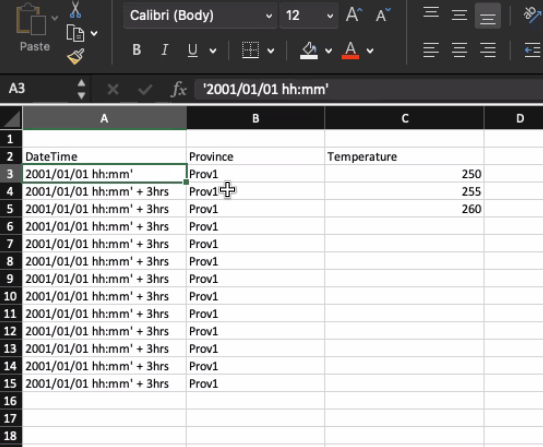

In [ ]:
#RUN FROM HERE
#2022_04_20

##### Read-in CSV file 

In [6]:
# installing dependencies
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [7]:
#All Years
air_temperature = pd.read_csv ("C:/Users/aster/OneDrive/Desktop/Air_Temperature/Air_Temperature_all_data_clean.csv", dtype=object)
air_temperature

,Umnugovi,Uvurkhangai,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,...,Govisumber,Khuvsgul,Khentii,Khovd,Orkhon,Sukhbaatar,Selenge,Tuv,Ulaanbaatar,Uvs
0,262.8161140708659,255.15618131362967,248.13691807066053,243.10936444182335,252.721272310136,252.15762730057872,249.28562712553702,252.94361744397037,261.514412323582,255.7702720034451,...,251.83707090284008,243.59961138918223,251.681330252772,251.3827976477402,250.63699702100837,259.16506787733346,249.46880377008878,250.17683806616122,249.28735185735766,246.99584635045136
1,264.67619326151856,256.82853609912104,249.48526107218336,251.58699806658825,256.23497060567155,253.19361179373593,250.16839753431128,255.24639144506608,263.78061586814647,257.1714585089649,...,255.79099941566344,246.44869537908568,254.67877112261323,257.19500190493727,252.44988873410026,260.4491367087029,250.42405397626504,251.2724536088218,249.58038089868205,252.4050420452716
2,262.5791750804785,252.6111008855336,247.09821436395006,252.13956644616357,253.85213364542867,250.76654908952307,246.97962161986976,253.68040780266585,261.144446074154,254.87350993668466,...,253.774096954846,245.1493447230195,252.9409357967534,258.1028640404621,249.4978530586264,258.07746276102176,247.72804083243938,247.15414960901887,245.80888229533898,253.13777173192162
3,251.54125399535675,243.1929899768695,243.22312276189305,251.49961861499304,248.71674308910178,244.89747749560334,239.62399746054268,252.96618446419367,255.60390980390542,248.156221393912,...,248.96318617023405,240.9707284369734,250.05122835511597,256.8715136273856,245.7665440126382,254.84643112915504,242.4022654561929,241.4286505268426,234.39590266437565,251.1902554017205
4,250.38813735629512,244.70553037577264,244.3345508476936,249.67413501502878,248.46095871281875,244.09720004776258,240.19634915169357,251.36841535877474,253.07457773548492,246.08042126773725,...,246.2183148618604,240.3898282669802,247.68921921275629,255.6866745028822,243.15287104954626,251.712577957927,241.13252890970074,239.0656157894528,232.88902895523105,251.59186315376934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63897,265.2589851200872,261.6474456427729,259.62577800832236,257.0540556627598,261.7864084783511,257.1962583937951,256.67736809003065,252.53544283172968,263.816578857499,263.2837373226547,...,259.6784358040231,255.93220535973745,256.13452024538094,260.29448226866725,257.7211850307114,255.79059968842628,256.46585846663044,258.1089546075895,256.33910489295596,254.4771991912109
63898,263.23590040263343,260.2463922187115,257.92454316041614,253.59757016366365,259.93845019194197,255.90478692963828,255.65829669304617,251.44513175138093,262.86778055061427,261.97968086354666,...,258.9305332246374,254.71802418357342,255.33945995000258,258.20089826287125,256.54406338747503,255.7256337171423,255.126817220997,257.34084403320634,255.6763105921328,252.38693770622424
63899,262.7175303883423,260.04456955977207,257.4238183682191,252.47789596818393,259.3042002300277,255.736094118022,255.39801815063805,250.98597351870808,262.4828582814296,261.5241047067975,...,258.0259649433073,254.52053734463715,254.93256795294212,257.69292084802953,256.90337845741203,255.79774849152204,254.97399719249725,257.19774955098944,255.77471971597134,251.4293776140963
63900,262.28885504921146,259.76870811223415,257.2025243831084,251.1351081151193,258.7038891601339,256.0865894615962,254.94105213915887,250.55629464828564,262.1706114211753,261.3254414507581,...,257.72059620091176,253.7037906702307,254.44852577478187,256.9549087970058,257.7387288978173,255.51834461314556,255.13659433052973,257.0289238795782,255.9432892500821,251.2630930820366


##### Add columns

In [11]:
all_data['Index'] = range(1, len(all_data) + 1)

all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,index column,Index
A20000101_0300_Tair_f_inst,262.8161140708659,255.15618131362967,248.13691807066053,243.10936444182335,252.721272310136,252.15762730057872,249.28562712553702,252.94361744397037,261.514412323582,255.7702720034451,...,251.681330252772,251.3827976477402,250.63699702100837,259.16506787733346,249.46880377008878,250.17683806616122,249.28735185735766,246.99584635045136,1,1
A20000101_0600_Tair_f_inst,264.67619326151856,256.82853609912104,249.48526107218336,251.58699806658825,256.23497060567155,253.19361179373593,250.16839753431128,255.24639144506608,263.78061586814647,257.1714585089649,...,254.67877112261323,257.19500190493727,252.44988873410026,260.4491367087029,250.42405397626504,251.2724536088218,249.58038089868205,252.4050420452716,2,2
A20000101_0900_Tair_f_inst,262.5791750804785,252.6111008855336,247.09821436395006,252.13956644616357,253.85213364542867,250.76654908952307,246.97962161986976,253.68040780266585,261.144446074154,254.87350993668466,...,252.9409357967534,258.1028640404621,249.4978530586264,258.07746276102176,247.72804083243938,247.15414960901887,245.80888229533898,253.13777173192162,3,3
A20000101_1200_Tair_f_inst,251.54125399535675,243.1929899768695,243.22312276189305,251.49961861499304,248.71674308910178,244.89747749560334,239.62399746054268,252.96618446419367,255.60390980390542,248.156221393912,...,250.05122835511597,256.8715136273856,245.7665440126382,254.84643112915504,242.4022654561929,241.4286505268426,234.39590266437565,251.1902554017205,4,4
A20000101_1500_Tair_f_inst,250.38813735629512,244.70553037577264,244.3345508476936,249.67413501502878,248.46095871281875,244.09720004776258,240.19634915169357,251.36841535877474,253.07457773548492,246.08042126773725,...,247.68921921275629,255.6866745028822,243.15287104954626,251.712577957927,241.13252890970074,239.0656157894528,232.88902895523105,251.59186315376934,5,5


### Add year & month

In [30]:
all_data['Month'] = all_data['0'].str[6:8]
all_data.head()

KeyError: '0'

#### Save cleaned dataframe as csv file

In [11]:
all_data.to_csv('Air_Temperature_all_data.csv', index=False)
print('new csv file from list was created... ')

new csv file from list was created... 


## PART IV: Exploratory Analysis

In [9]:
air_temperature.describe()

,Umnugovi,Uvurkhangai,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,...,Govisumber,Khuvsgul,Khentii,Khovd,Orkhon,Sukhbaatar,Selenge,Tuv,Ulaanbaatar,Uvs
count,63902,63902,63902,63902,63902,63902,63902,63902,63902,63902,...,63902,63902,63902,63902,63902,63902,63902,63902,63902,63902
unique,63902,63902,63902,63902,63902,63902,63902,63902,63902,63902,...,63902,63902,63902,63902,63899,63902,63902,63902,63902,63902
top,262.8161140708659,255.15618131362967,248.13691807066053,243.10936444182335,252.721272310136,252.15762730057872,249.28562712553702,252.94361744397037,261.514412323582,255.7702720034451,...,251.83707090284008,243.59961138918223,251.681330252772,251.3827976477402,283.0315686919231,259.16506787733346,249.46880377008878,250.17683806616122,249.28735185735766,246.99584635045136
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,1


## PART V: Build Predictive Model

## PART VI: Validate Model